In [1]:
import json
import glob
import re

import pandas as pd
import numpy as np

In [2]:
userrepos_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "created_at": [],
    "pushed_at": [],
    "updated_at": [],
    "fork": [],
    "language": [],
    "size": [],
    "description": [],
    "homepage": [],
    "license": [],
    "forks_count": [],
    "open_issues_count": [],
    "stargazers_count": [],
    "watchers_count": [],
}
for filename in glob.glob("/mnt/forks-of-cmssw/user-repos/*.json"):
    for repo in json.load(open(filename)):
        userrepos_lists["repo_id"].append(repo["id"])
        userrepos_lists["owner_login"].append(repo["owner"]["login"])
        userrepos_lists["owner_id"].append(repo["owner"]["id"])
        userrepos_lists["repo_name"].append(repo["name"])
        userrepos_lists["created_at"].append(pd.to_datetime(repo["created_at"]))
        userrepos_lists["pushed_at"].append(pd.to_datetime(repo["pushed_at"]))
        userrepos_lists["updated_at"].append(pd.to_datetime(repo["updated_at"]))
        userrepos_lists["fork"].append(repo["fork"])
        userrepos_lists["language"].append(repo["language"])
        userrepos_lists["size"].append(repo["size"])
        userrepos_lists["description"].append(repo["description"])
        userrepos_lists["homepage"].append(repo["homepage"])
        userrepos_lists["license"].append(None if repo["license"] is None else repo["license"]["name"])
        userrepos_lists["forks_count"].append(repo["forks_count"])
        userrepos_lists["open_issues_count"].append(repo["open_issues_count"])
        userrepos_lists["stargazers_count"].append(repo["stargazers_count"])
        userrepos_lists["watchers_count"].append(repo["watchers_count"])

In [3]:
userrepos = pd.DataFrame(userrepos_lists)
userrepos

,repo_id,owner_login,owner_id,repo_name,created_at,pushed_at,updated_at,fork,language,size,description,homepage,license,forks_count,open_issues_count,stargazers_count,watchers_count


In [4]:
users_with_cmssw = userrepos[(userrepos["repo_name"] == "cmssw") & (userrepos["fork"])]["owner_login"]

In [5]:
users_with_cmssw

Series([], Name: owner_login, dtype: float64)

In [6]:
userrepos_cut = userrepos[userrepos["owner_login"].isin(users_with_cmssw)]
userrepos_cut = userrepos_cut[~userrepos_cut["fork"]]

In [7]:
userrepos_cut

""


In [8]:
userrepos_cut["Python"] = userrepos_cut["language"] == "Python"
userrepos_cut["Jupyter"] = userrepos_cut["language"] == "Jupyter Notebook"
userrepos_cut["C and C++"] = (userrepos_cut["language"] == "C") | (userrepos_cut["language"] == "C++")

KeyError: 'language'

In [ ]:
physicists = userrepos_cut.copy()
physicists.index = physicists["created_at"]
bylanguage = physicists[["C and C++", "Python", "Jupyter"]].resample("90D", origin=userrepos_cut["created_at"].max()).sum()
ax = bylanguage.plot(yerr=np.sqrt(bylanguage), marker="o", ls="none", rot=0, figsize=(10, 6))
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.5*275, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 0.97*275, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 0.97*275, "End of Run 2", rotation=90, va="top")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Repositories created by CMS physicists per 90 days")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 275)
ax.legend(loc="upper left")
ax.get_figure().savefig("PLOTS/github-cmssw-language.svg")

In [ ]:
# (
#     (userrepos_cut["updated_at"] - userrepos_cut["created_at"]).dt.total_seconds() / (24*60*60)
# ).plot.hist(bins=100, range=(10, 3*365))

In [ ]:
# words = userrepos_cut.description.str.lower().str.replace(re.compile(r"[^a-z0-9\s_\.-]"), "").str.split(r"[\s_\.-]+")

In [ ]:
# personal = [
#     "my",
#     "personal",
# ]

# educational = [
#     "thesis",
#     "phd",
#     "masters",
#     "dissertation",
#     "presentation",
#     "presentations",
#     "proceedings",
#     "tutorial",
#     "tutorials",
#     "university",
#     "universities",
#     "classroom",
#     "workshop",
# ]

# analysis = [
#     "analyze",
#     "analysis",
#     "analyses",
#     "analyzer",
#     "analyzing",
#     "study",
#     "studies",
#     "script",
#     "scripts",
#     "plot",
#     "plots",
#     "plotting",
#     "plotter",
#     "plotters",
#     "histogram",
#     "histograms",
#     "macros",
#     "tool",
#     "tools",
#     "framework",
#     "frameworks",
#     "toolkit",
#     "toolkits",
# ]

# machine_learning = [
#     "ml",
#     "machine",
#     "learn",
#     "learning",
#     "neural",
#     "training",
#     "regression",
#     "regressions",
#     "bdt",
#     "mva",
# ]

# computer_words = [
#     "python",
#     "c",
#     "javascript",
#     "latex",
#     "php",
#     "jupyter",
#     "spark",
#     "aws",
#     "keras",
#     "tensorflow",
#     "gpu",
#     "matlab",
#     "torch",
#     "pytorch",
#     "julia",
#     "vim",
#     "boost",
#     "clang",
#     "ipython",
#     "openstack",
#     "bash",
#     "matplotlib",
#     "docker",
#     "dockerfile",
#     "sql",
#     "json",
#     "xml",
#     "rust",
#     "scala",
#     "cmake",
#     "ruby",
#     "kubernetes",
#     "webgl",
#     "beamer",
# ]

# physics_brands = [
#     "cms",
#     "cmssw",
#     "root",
#     "xrootd",
#     "cern",
#     "geant",
#     "geant4",
#     "atlas",
#     "tmva",
#     "htcondor",
#     "grid",
#     "delphes",
#     "pythia",
#     "pythia6",
#     "pythia8",
#     "houches",
#     "edm",
#     "svfit",
#     "fastjet",
#     "roofit",
#     "crab3",
#     "lxplus",
# ]

# physics_likely = [
#     "trigger",
#     "triggers",
#     "detector",
#     "detectors",
#     "reconstruction",
#     "simulate",
#     "simulates",
#     "simulating",
#     "simulator",
#     "simulators",
#     "simulation",
#     "simulations",
#     "validation",
#     "validations",
#     "calibration",
#     "calibrations",
#     "alignment",
#     "alignments",
#     "energy",
#     "energies",
#     "particle",
#     "particles",
#     "event",
#     "events",
#     "beam",
#     "mass",
#     "tagging",
#     "tagger",
#     "taggers",
#     "tracking",
#     "fit",
#     "fits",
#     "fitter",
#     "fitters",
#     "signal",
#     "signals",
#     "background",
#     "backgrounds",
#     "cluster",
#     "clusters",
#     "gem",
#     "run2",
#     "quantum",
#     "cosmic",
#     "charge",
#     "charged",
#     "clustering",
#     "tuple",
#     "tuples",
#     "luminosity",
#     "collision",
#     "collisions",
#     "colliding",
#     "momentum",
#     "momenta",
#     "top",
#     "tops",
# ]

# physics_definite = [
#     "ntuple",
#     "ntuples",
#     "ntuplizer",
#     "ntuplizers",
#     "kinematic",
#     "qcd",
#     "mc",
#     "monte",
#     "carlo",
#     "carlos",
#     "tev",
#     "susy",
#     "daq",
#     "dqm",
#     "hcal",
#     "hgcal",
#     "ecal",
#     "tracker",
#     "rpc",
#     "hlt",
#     "lhe",
#     "jet",
#     "jets",
#     "quark",
#     "quarks",
#     "higgs",
#     "tau",
#     "taus",
#     "muon",
#     "muons",
#     "photon",
#     "photons",
#     "electron",
#     "electrons",
#     "proton",
#     "protons",
#     "lepton",
#     "leptons",
#     "leptonic",
#     "hadron",
#     "hadrons",
#     "hadronic",
#     "meson",
#     "mesons",
#     "mu",
#     "gamma",
#     "decay",
#     "decays",
#     "boson",
#     "fermion",
#     "ttbar",
#     "boosted",
# ]

In [ ]:
# userrepos_cut["personal"] = words.apply(lambda d: False if d is None else any(word in personal for word in d))
# userrepos_cut["educational"] = words.apply(lambda d: False if d is None else any(word in educational for word in d))
# userrepos_cut["analysis"] = words.apply(lambda d: False if d is None else any(word in analysis for word in d))
# userrepos_cut["machine_learning"] = words.apply(lambda d: False if d is None else any(word in machine_learning for word in d))
# userrepos_cut["computer_words"] = words.apply(lambda d: False if d is None else any(word in computer_words for word in d))
# userrepos_cut["physics_brands"] = words.apply(lambda d: False if d is None else any(word in physics_brands for word in d))
# userrepos_cut["physics_likely"] = words.apply(lambda d: False if d is None else any(word in physics_likely for word in d))
# userrepos_cut["physics_definite"] = words.apply(lambda d: False if d is None else any(word in physics_definite for word in d))

In [ ]:
# userrepos_cut["long_lived"] = (userrepos_cut["updated_at"] - userrepos_cut["created_at"]).dt.total_seconds() > (7*24*60*60)

In [ ]:
# all_words = words.explode()

In [ ]:
# ax = all_words[
#     all_words.isin(educational) | all_words.isin(analysis) | all_words.isin(machine_learning) |
#     all_words.isin(physics_brands) | all_words.isin(physics_likely) | all_words.isin(physics_definite)
# ].value_counts(ascending=True).iloc[-25:].plot.barh(width=1.0, figsize=(10, 6))
# ax.set_xlabel("Number of repositories with a given word in its description")

In [ ]:
# physicists = userrepos_cut[(
#     userrepos_cut["educational"] | userrepos_cut["analysis"] |  userrepos_cut["machine_learning"] |
#     userrepos_cut["physics_brands"] | userrepos_cut["physics_likely"] | userrepos_cut["physics_definite"]
# ) & userrepos_cut["long_lived"]]
# physicists.index = physicists["created_at"]
# bylanguage = physicists[["C and C++", "Python", "Jupyter"]].resample("90D", origin=userrepos_cut["created_at"].max()).sum()
# ax = bylanguage.plot(yerr=np.sqrt(bylanguage), marker="o", ls="none", rot=0, figsize=(10, 6))
# ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
# ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 97, "CMSSW moved to GitHub", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 97, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 97, "End of Run 2", rotation=90, va="top")
# years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
# ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
# ax.set_xticklabels(years, ha="center")
# ax.set_xlabel("Repository creation date")
# ax.set_ylabel("Repositories created by CMS physicists per 90 days")
# ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
# ax.set_ylim(0, 100)
# ax.legend(loc="upper left");

In [ ]:
userrepos_cut2 = userrepos[
    userrepos["owner_login"].isin(users_with_cmssw) &
    ~userrepos["fork"]
].copy()
userrepos_cut2["C and C++"] = (userrepos_cut2["language"] == "C") | (userrepos_cut2["language"] == "C++")
userrepos_cut2["Python"] = userrepos_cut2["language"] == "Python"
userrepos_cut2["Jupyter"] = userrepos_cut2["language"] == "Jupyter Notebook"
userrepos_cut2 = userrepos_cut2.groupby([
    pd.Grouper(key="owner_login"),
    pd.Grouper(key="created_at", freq="90D", origin=userrepos_cut["created_at"].max()),
])[["C and C++", "Python", "Jupyter"]].sum()
sum1 = userrepos_cut2.groupby(level=1).count()
sumx = userrepos_cut2.groupby(level=1).sum()
sumxx = (userrepos_cut2**2).groupby(level=1).sum()
y = (sumx / sum1)
yerr = np.sqrt((sumxx / sum1) - (sumx / sum1)**2) / np.sqrt(sum1)

In [ ]:
ax = y.plot(yerr=yerr, marker="o", ls="none", rot=0, figsize=(10, 6))
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 1.5*0.97, "CMSSW moved to GitHub", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 1.5*0.97, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 1.5*0.97, "End of Run 2", rotation=90, va="top")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Average new repositories per CMS physicist in 90 days")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 1.5)
ax.legend(loc="upper left")
ax.get_figure().savefig("PLOTS/github-cmssw-language-byuser.svg")

In [ ]:
search_uproot_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/uproot/*.json"):
    for match in json.load(open(filename))["items"]:
        search_uproot_lists["repo_id"].append(match["repository"]["id"])
        search_uproot_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_uproot_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_uproot_lists["repo_name"].append(match["repository"]["name"])
        search_uproot_lists["path"].append(match["path"])
        search_uproot_lists["fork"].append(match["repository"]["fork"])

search_uproot = pd.DataFrame(search_uproot_lists)
search_uproot.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_uproot_vstime = pd.merge(search_uproot, userrepos.set_index(["owner_login", "repo_name"]))
search_uproot_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_uproot_vstime = search_uproot_vstime.groupby(level=2).max()["repo_id"] != 0
search_uproot_vstime = search_uproot_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [ ]:
search_importuproot_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/import-uproot/*.json"):
    for match in json.load(open(filename))["items"]:
        search_importuproot_lists["repo_id"].append(match["repository"]["id"])
        search_importuproot_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_importuproot_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_importuproot_lists["repo_name"].append(match["repository"]["name"])
        search_importuproot_lists["path"].append(match["path"])
        search_importuproot_lists["fork"].append(match["repository"]["fork"])

search_importuproot = pd.DataFrame(search_importuproot_lists)
search_importuproot.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_importuproot_vstime = pd.merge(search_importuproot, userrepos.set_index(["owner_login", "repo_name"]))
search_importuproot_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_importuproot_vstime = search_importuproot_vstime.groupby(level=2).max()["repo_id"] != 0
search_importuproot_vstime = search_importuproot_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [ ]:
search_iminuit_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/iminuit/*.json"):
    for match in json.load(open(filename))["items"]:
        search_iminuit_lists["repo_id"].append(match["repository"]["id"])
        search_iminuit_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_iminuit_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_iminuit_lists["repo_name"].append(match["repository"]["name"])
        search_iminuit_lists["path"].append(match["path"])
        search_iminuit_lists["fork"].append(match["repository"]["fork"])

search_iminuit = pd.DataFrame(search_iminuit_lists)
search_iminuit.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_iminuit_vstime = pd.merge(search_iminuit, userrepos.set_index(["owner_login", "repo_name"]))
search_iminuit_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_iminuit_vstime = search_iminuit_vstime.groupby(level=2).max()["repo_id"] != 0
search_iminuit_vstime = search_iminuit_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [ ]:
search_rootnumpy_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/root-numpy/*.json"):
    for match in json.load(open(filename))["items"]:
        search_rootnumpy_lists["repo_id"].append(match["repository"]["id"])
        search_rootnumpy_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_rootnumpy_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_rootnumpy_lists["repo_name"].append(match["repository"]["name"])
        search_rootnumpy_lists["path"].append(match["path"])
        search_rootnumpy_lists["fork"].append(match["repository"]["fork"])

search_rootnumpy = pd.DataFrame(search_rootnumpy_lists)
search_rootnumpy.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_rootnumpy_vstime = pd.merge(search_rootnumpy, userrepos.set_index(["owner_login", "repo_name"]))
search_rootnumpy_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_rootnumpy_vstime = search_rootnumpy_vstime.groupby(level=2).max()["repo_id"] != 0
search_rootnumpy_vstime = search_rootnumpy_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [ ]:
search_pythonroot_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/python-root/*.json"):
    for match in json.load(open(filename))["items"]:
        search_pythonroot_lists["repo_id"].append(match["repository"]["id"])
        search_pythonroot_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_pythonroot_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_pythonroot_lists["repo_name"].append(match["repository"]["name"])
        search_pythonroot_lists["path"].append(match["path"])
        search_pythonroot_lists["fork"].append(match["repository"]["fork"])

search_pythonroot = pd.DataFrame(search_pythonroot_lists)
search_pythonroot.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_pythonroot_vstime = pd.merge(search_pythonroot, userrepos.set_index(["owner_login", "repo_name"]))
search_pythonroot_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_pythonroot_vstime = search_pythonroot_vstime.groupby(level=2).max()["repo_id"] != 0
search_pythonroot_vstime = search_pythonroot_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [ ]:
search_cpproot_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/cpp-root/*.json"):
    for match in json.load(open(filename))["items"]:
        search_cpproot_lists["repo_id"].append(match["repository"]["id"])
        search_cpproot_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_cpproot_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_cpproot_lists["repo_name"].append(match["repository"]["name"])
        search_cpproot_lists["path"].append(match["path"])
        search_cpproot_lists["fork"].append(match["repository"]["fork"])

search_cpproot = pd.DataFrame(search_cpproot_lists)
search_cpproot.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_cpproot_vstime = pd.merge(search_cpproot, userrepos.set_index(["owner_login", "repo_name"]))
search_cpproot_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_cpproot_vstime = search_cpproot_vstime.groupby(level=2).max()["repo_id"] != 0
search_cpproot_vstime = search_cpproot_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [ ]:
search_cpproot

In [ ]:
search_anyroot = pd.merge(
    search_cpproot.set_index("repo_id"),
    search_pythonroot.set_index("repo_id"),
    left_on=["owner_login", "repo_name"],
    right_on=["owner_login", "repo_name"],
    how="outer",
)
search_anyroot.set_index(["owner_login", "repo_name"], inplace=True, drop=False)
search_anyroot_vstime = pd.merge(search_anyroot, userrepos.set_index(["owner_login", "repo_name"]), left_index=True, right_index=True)
search_anyroot_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_anyroot_vstime = search_anyroot_vstime.groupby(level=2).max()["repo_id"] != 0
search_anyroot_vstime = search_anyroot_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [ ]:
search_packages = {}
for package in ["matplotlib", "cpp-tmva", "python-tmva", "cpp-torch", "python-torch", "cpp-tensorflow", "python-tensorflow",
                "sklearn", "tensorflow", "pandas", "numpy", "cpp-xgboost", "python-xgboost"]:
    search_lists = {
        "repo_id": [],
        "owner_login": [],
        "owner_id": [],
        "repo_name": [],
        "path": [],
        "fork": [],
    }

    for filename in glob.glob("/mnt/forks-of-cmssw/packages/" + package + "/*.json"):
        for match in json.load(open(filename))["items"]:
            search_lists["repo_id"].append(match["repository"]["id"])
            search_lists["owner_login"].append(match["repository"]["owner"]["login"])
            search_lists["owner_id"].append(match["repository"]["owner"]["id"])
            search_lists["repo_name"].append(match["repository"]["name"])
            search_lists["path"].append(match["path"])
            search_lists["fork"].append(match["repository"]["fork"])

    search = pd.DataFrame(search_lists)
    search.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

    search_vstime = pd.merge(search, userrepos.set_index(["owner_login", "repo_name"]))
    search_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
    search_vstime = search_vstime.groupby(level=2).max()["repo_id"] != 0
    search_vstime = search_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

    search_packages[package] = search_vstime

In [ ]:
search_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in (
    glob.glob("/mnt/forks-of-cmssw/packages/sklearn/*.json") +
    glob.glob("/mnt/forks-of-cmssw/packages/python-torch/*.json") +
    glob.glob("/mnt/forks-of-cmssw/packages/python-tensorflow/*.json") +
    glob.glob("/mnt/forks-of-cmssw/packages/python-xgboost/*.json") +
    glob.glob("/mnt/forks-of-cmssw/packages/sklearn/*.json")
):
    for match in json.load(open(filename))["items"]:
        search_lists["repo_id"].append(match["repository"]["id"])
        search_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_lists["repo_name"].append(match["repository"]["name"])
        search_lists["path"].append(match["path"])
        search_lists["fork"].append(match["repository"]["fork"])

search = pd.DataFrame(search_lists)
search.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_vstime = pd.merge(search, userrepos.set_index(["owner_login", "repo_name"]))
search_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_vstime = search_vstime.groupby(level=2).max()["repo_id"] != 0
search_vstime = search_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

search_packages["python-ml"] = search_vstime

In [ ]:
ax = search_anyroot_vstime.plot(yerr=np.sqrt(search_anyroot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_importuproot_vstime.plot(yerr=np.sqrt(search_importuproot_vstime), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 275)
ax.legend([
    "C++ \"include TFile\" or Python \"ROOT.TFile\"", "Python \"import uproot\""
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 250*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-anyroot-uproot.svg")

In [ ]:
ax = search_cpproot_vstime.plot(yerr=np.sqrt(search_cpproot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_pythonroot_vstime.plot(yerr=np.sqrt(search_pythonroot_vstime), marker="o", ls="none", rot=0, ax=ax)
search_importuproot_vstime.plot(yerr=np.sqrt(search_importuproot_vstime), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 200)
ax.legend([
    "C++ \"include TFile\"", "Python \"ROOT.TFile\"", "Python \"import uproot\""
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 125*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-root-uproot.svg")

In [ ]:
ax = search_cpproot_vstime.plot(yerr=np.sqrt(search_cpproot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_pythonroot_vstime.plot(yerr=np.sqrt(search_pythonroot_vstime), marker="o", ls="none", rot=0, ax=ax)
search_uproot_vstime.plot(yerr=np.sqrt(search_uproot_vstime), marker="o", ls="none", rot=0, ax=ax)
search_iminuit_vstime.plot(yerr=np.sqrt(search_iminuit_vstime), marker="o", ls="none", rot=0, ax=ax)
search_rootnumpy_vstime.plot(yerr=np.sqrt(search_rootnumpy_vstime), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 200)
ax.legend([
    "C++ \"include TFile\"", "Python \"ROOT.TFile\"", "Python \"uproot\"", "Python \"root-numpy\"", "Python \"iminuit\""
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 125*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-root-python.svg")

In [ ]:
ax = search_packages["sklearn"].plot(yerr=np.sqrt(search_packages["sklearn"]), marker="o", ls="none", rot=0, figsize=(10, 6))
search_packages["python-tensorflow"].plot(yerr=np.sqrt(search_packages["python-tensorflow"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["python-torch"].plot(yerr=np.sqrt(search_packages["python-torch"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["python-xgboost"].plot(yerr=np.sqrt(search_packages["python-xgboost"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["python-tmva"].plot(yerr=np.sqrt(search_packages["python-tmva"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["cpp-tmva"].plot(yerr=np.sqrt(search_packages["cpp-tmva"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["cpp-torch"].plot(yerr=np.sqrt(search_packages["cpp-torch"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["cpp-tensorflow"].plot(yerr=np.sqrt(search_packages["cpp-tensorflow"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["cpp-xgboost"].plot(yerr=np.sqrt(search_packages["cpp-xgboost"]), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 80)
ax.legend([
    "Python \"sklearn\"",
    "Python \"import tensorflow\"",
    "Python \"import torch\"",
    "Python \"import xgboost\"",
    "Python \"TMVA\"",
    "C++ \"TMVA\"",
    "C++ \"include torch\"",
    "C++ \"include tensorflow\"",
    "C++ \"include xgboost\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 42*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-machine-learning.svg")

In [ ]:
ax = search_anyroot_vstime.plot(yerr=np.sqrt(search_anyroot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_packages["numpy"].plot(yerr=np.sqrt(search_packages["numpy"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["matplotlib"].plot(yerr=np.sqrt(search_packages["matplotlib"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["pandas"].plot(yerr=np.sqrt(search_packages["pandas"]), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 310)
ax.legend([
    "C++ \"include TFile\" or Python \"ROOT.TFile\"", "Python \"import numpy\"", "Python \"matplotlib\"", "Python \"import pandas\""
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 225*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-anyroot-python.svg")

In [ ]:
ax = search_anyroot_vstime.plot(yerr=np.sqrt(search_anyroot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_packages["numpy"].plot(yerr=np.sqrt(search_packages["numpy"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["matplotlib"].plot(yerr=np.sqrt(search_packages["matplotlib"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["pandas"].plot(yerr=np.sqrt(search_packages["pandas"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["python-ml"].plot(yerr=np.sqrt(search_packages["python-ml"]), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 310)
ax.legend([
    "C++ \"include TFile\" or Python \"ROOT.TFile\"", "Python \"import numpy\"", "Python \"matplotlib\"", "Python \"import pandas\"",
    "All Python machine learning packages",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 225*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-anyroot-python-machinelearning.svg")

In [ ]:
ax = search_anyroot_vstime.plot(yerr=np.sqrt(search_anyroot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_packages["numpy"].plot(yerr=np.sqrt(search_packages["numpy"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["matplotlib"].plot(yerr=np.sqrt(search_packages["matplotlib"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["pandas"].plot(yerr=np.sqrt(search_packages["pandas"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["python-ml"].plot(yerr=np.sqrt(search_packages["python-ml"]), marker="o", ls="none", rot=0, ax=ax)
search_importuproot_vstime.plot(yerr=np.sqrt(search_importuproot_vstime), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 310)
ax.legend([
    "C++ \"include TFile\" or Python \"ROOT.TFile\"", "Python \"import numpy\"", "Python \"matplotlib\"", "Python \"import pandas\"",
    "All Python machine learning packages",
    "Python \"import uproot\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 225*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-anyroot-python-machinelearning-uproot.svg")

In [ ]:
ax = search_anyroot_vstime.plot(yerr=np.sqrt(search_anyroot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_packages["numpy"].plot(yerr=np.sqrt(search_packages["numpy"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["matplotlib"].plot(yerr=np.sqrt(search_packages["matplotlib"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["pandas"].plot(yerr=np.sqrt(search_packages["pandas"]), marker="o", ls="none", rot=0, ax=ax)
search_importuproot_vstime.plot(yerr=np.sqrt(search_importuproot_vstime), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 310)
ax.legend([
    "C++ \"include TFile\" or Python \"ROOT.TFile\"", "Python \"import numpy\"", "Python \"matplotlib\"", "Python \"import pandas\"", "Python \"import uproot\""
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 225*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-anyroot-python-uproot.svg")

In [ ]:
ax = search_packages["tensorflow"].plot(yerr=np.sqrt(search_packages["tensorflow"]), marker="o", ls="none", rot=0, figsize=(10, 6))
search_packages["python-tensorflow"].plot(yerr=np.sqrt(search_packages["python-tensorflow"]), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 200)
ax.legend([
    "Python \"tensorflow\"", "Python \"import tensorflow\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 150*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-tensorflow-crosscheck.svg")

In [9]:
preworkshop = pd.read_csv("/home/jpivarski/storage/data/physicists/pyhep2020-preworkshop-survey.csv")
# postworkshop = pd.read_csv("/mnt/postworkshop-survey.csv")

In [17]:
preworkshop.columns.tolist()

['Submitter',
 'Submitter Email',
 'Submission Date',
 'PyHEP feedback: Atlantic: 15:00 CET, 06:00 PDT, 18:30 IST, 22:00 JST',
 'PyHEP feedback: Pacific: 00:00 CET, 15:00 PDT, 03:30 IST, 07:00 JST',
 'PyHEP feedback: Indian Ocean: 09:00 CET, 00:00 PDT, 12:30 IST, 16:00 JST',
 'PyHEP feedback: In what country do you currently reside?',
 'PyHEP feedback: How did you hear about this workshop?',
 'PyHEP feedback: Do you want to clarify how you found out about this workshop?',
 'PyHEP feedback: What are you hoping to learn from this workshop?',
 'PyHEP feedback: Do you want to clarify what you are hoping to learn from this workshop?',
 'Personal demographics: What best describes your gender?',
 'Personal demographics: What is your country of origin?',
 'Personal demographics: If you like, you may describe your race or ethnicity here.',
 'Professional life: What best describes your occupation?',
 'Professional life: Do you want to clarify your occupation?',
 'Professional life: What best des

In [10]:
c = preworkshop["Professional life: Are you associated with one or more experimental or theoretical collaborations? (E.g. ATLAS, CMS, DUNE, USQCD...)"]
is_cms = (
    (c == "Belle II, CMS") |
    (c == "cms") |
    (c == "Cms") |
    (c == "CMS") |
    (c == "CMS, ALICE") |
    (c == "CMS, DUNE") |
    (c == "CMS Experiment") |
    (c == "CMS, SModelS") |
    (c == "I am in a team that they are in collaboration with CMS and I am going to join in a CERN group.") |
    (c == "I'm associated with CMS experiment") |
    (c == "Just switched from CMS to CTA") |
    (c == "yes, CMS") |
    (c == "Yes: CMS")
)

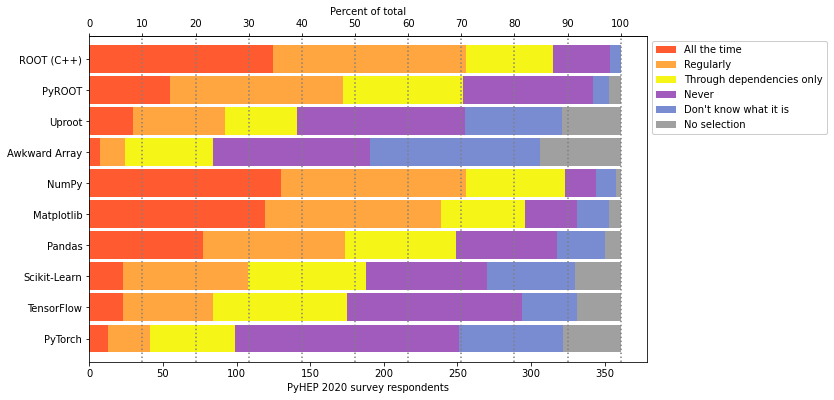

In [39]:
cols = {
    "Particle physics ecosystem: ROOT in C++: https://root.cern": "ROOT (C++)",
    "Particle physics ecosystem: ROOT through PyROOT: https://root.cern": "PyROOT",
    "Particle physics ecosystem: Uproot: https://github.com/scikit-hep/uproot": "Uproot",
    "Particle physics ecosystem: Awkward Array: https://github.com/scikit-hep/awkward-array": "Awkward Array",
    "Python ecosystem: NumPy: https://numpy.org": "NumPy",
    "Python ecosystem: Matplotlib: https://matplotlib.org": "Matplotlib",
    "Python ecosystem: Pandas: https://pandas.pydata.org": "Pandas",
    'Python ecosystem: SciKit-Learn: https://scikit-learn.org': "Scikit-Learn",
    'Python ecosystem: TensorFlow: https://www.tensorflow.org': "TensorFlow",
    'Python ecosystem: PyTorch: https://pytorch.org': "PyTorch",
}
order = [
    "Particle physics ecosystem: ROOT in C++: https://root.cern",
    "Particle physics ecosystem: ROOT through PyROOT: https://root.cern",
    "Particle physics ecosystem: Uproot: https://github.com/scikit-hep/uproot",
    "Particle physics ecosystem: Awkward Array: https://github.com/scikit-hep/awkward-array",
    "Python ecosystem: NumPy: https://numpy.org",
    "Python ecosystem: Matplotlib: https://matplotlib.org",
    "Python ecosystem: Pandas: https://pandas.pydata.org",
    'Python ecosystem: SciKit-Learn: https://scikit-learn.org',
    'Python ecosystem: TensorFlow: https://www.tensorflow.org',
    'Python ecosystem: PyTorch: https://pytorch.org',
]
pkgs = preworkshop[order[::-1]].rename(columns=cols).apply(pd.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
][::-1]].fillna(0)
pkgs.insert(5, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
ax = pkgs.plot.barh(stacked=True, width=0.9, figsize=(10, 6), color=["#a0a0a0", "#798bd1", "#a05bbd", "#f5f518", "#ffa640", "#ff5a30"][::-1])
num_respondents = pkgs.sum(axis=1).mean()
ax.axvline(0.1*num_respondents, c="gray", ls=":")
ax.axvline(0.2*num_respondents, c="gray", ls=":")
ax.axvline(0.3*num_respondents, c="gray", ls=":")
ax.axvline(0.4*num_respondents, c="gray", ls=":")
ax.axvline(0.5*num_respondents, c="gray", ls=":")
ax.axvline(0.6*num_respondents, c="gray", ls=":")
ax.axvline(0.7*num_respondents, c="gray", ls=":")
ax.axvline(0.8*num_respondents, c="gray", ls=":")
ax.axvline(0.9*num_respondents, c="gray", ls=":")
ax.axvline(1.0*num_respondents, c="gray", ls=":")
axR = ax.secondary_xaxis("top")
axR.set_xticks([x*num_respondents for x in (0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)])
axR.set_xticklabels(["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"])
axR.set_xlabel("Percent of total")
ax.legend(bbox_to_anchor=(1, 1), framealpha=1)
ax.set_ylim(-0.75, 9.75)
ax.set_xlabel("PyHEP 2020 survey respondents")
ax.get_figure().savefig("PLOTS/pyhepsurvey-root-uproot.svg")
ax.get_figure().savefig("PLOTS/pyhepsurvey-root-uproot.png")

In [73]:
mapping = lambda x: {
    "No selection": 0,
    "Don't know what it is": 0,
    "Never": 0,
    "Through dependencies only": 1,
    "Regularly": 2,
    "All the time": 3,
}[x]
indicator = preworkshop[order].rename(columns=cols).fillna("No selection").applymap(mapping)
correlation = indicator.corr()   # (lambda x, y: (x * y).sum() / len(x))
correlation

,ROOT (C++),PyROOT,Uproot,Awkward Array,NumPy,Matplotlib,Pandas,Scikit-Learn,TensorFlow,PyTorch
ROOT (C++),1.000000,0.404895,0.053356,0.025887,0.074275,0.005811,0.047112,0.042850,0.019917,0.043986
PyROOT,0.404895,1.000000,0.294630,0.187740,0.262953,0.229350,0.198290,0.213647,0.192959,0.231518
Uproot,0.053356,0.294630,1.000000,0.668011,0.405808,0.368465,0.368632,0.315797,0.283393,0.214516
Awkward Array,0.025887,0.187740,0.668011,1.000000,0.315220,0.247939,0.205517,0.194408,0.217681,0.202384
NumPy,0.074275,0.262953,0.405808,0.315220,1.000000,0.803662,0.654638,0.518171,0.433850,0.325458
Matplotlib,0.005811,0.229350,0.368465,0.247939,0.803662,1.000000,0.664974,0.515772,0.372332,0.295034
Pandas,0.047112,0.198290,0.368632,0.205517,0.654638,0.664974,1.000000,0.573836,0.405206,0.324744
Scikit-Learn,0.042850,0.213647,0.315797,0.194408,0.518171,0.515772,0.573836,1.000000,0.576844,0.441248
TensorFlow,0.019917,0.192959,0.283393,0.217681,0.433850,0.372332,0.405206,0.576844,1.000000,0.428001
PyTorch,0.043986,0.231518,0.214516,0.202384,0.325458,0.295034,0.324744,0.441248,0.428001,1.000000


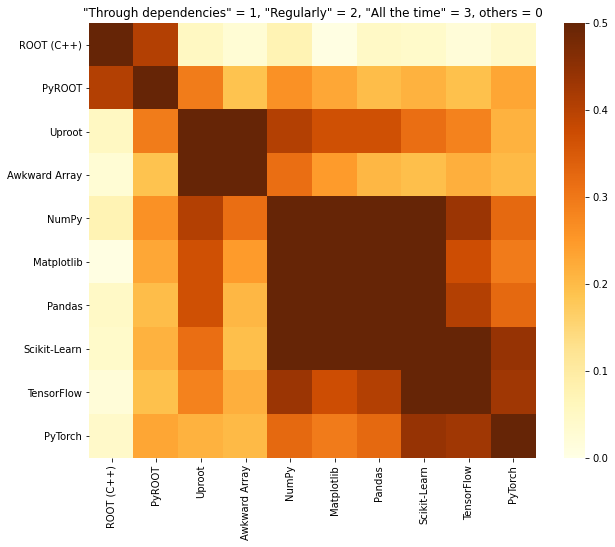

In [84]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    norm=matplotlib.colors.Normalize(0, 0.5),
    cmap=sns.color_palette("YlOrBr", as_cmap=True),
)
ax.set_title('"Through dependencies" = 1, "Regularly" = 2, "All the time" = 3, others = 0')
ax.get_figure().savefig("PLOTS/pyhepsurvey-correlation.svg")
ax.get_figure().savefig("PLOTS/pyhepsurvey-correlation.png")